### Librerías

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Conexión SQL
# ==============================================================================
import psycopg2 as ps

import seaborn as sns

#Biblioteca para estimar modelos estadísticos y realizar pruebas estadísticas.
# ==============================================================================
import statsmodels.formula.api as sfm 

from sklearn.preprocessing import PolynomialFeatures 

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn import linear_model

### Conexión SQL

In [2]:
conexion = ps.connect(host="codbview.c21jlbp5d5qr.us-east-1.rds.amazonaws.com", database="codb", user="sgonzalez", password="AdarlaToda100%",port="5432")

In [3]:
# Creamos el cursor con el objeto conexion
cur = conexion.cursor()

# Ejecutamos una consulta
sql = """
select ipc, activations, radio, tv, ooh, pop, digital_performance, rotacion, comisiones,
eventos_alto_bitacora, eventos_bajo_bitacora, eventos_medio_bitacora 
from sal_indicators_in sa 
where sales_channel = 'Direct Sales Force'
"""

consulta = cur.execute(sql)

data = cur.fetchall()

In [4]:
df = pd.DataFrame(data,columns=['ipc','activations','radio','tv','ooh','pop','digital_performance','rotacion','comisiones','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'])

df['ipc']=df['ipc'].astype('float')
df['rotacion']=df['rotacion'].astype('float')
df['eventos_alto_bitacora']=df['eventos_alto_bitacora'].astype('float')
df['eventos_bajo_bitacora']=df['eventos_bajo_bitacora'].astype('float')
df['eventos_medio_bitacora']=df['eventos_medio_bitacora'].astype('float')

df = df.fillna(0)
#df = df.dropna()

df.head()

,ipc,activations,radio,tv,ooh,pop,digital_performance,rotacion,comisiones,eventos_alto_bitacora,eventos_bajo_bitacora,eventos_medio_bitacora
0,1.60,18199,41687525,771166,0,2884220.0,365633245,0.10,10863114.0,0.00,0.0,1.00
1,1.56,19156,57231920,95440163,79373000,8170000.0,422084086,0.09,16386753.0,0.75,0.0,0.25
2,1.51,18750,116243171,194643334,0,0.0,429255030,0.09,29842964.0,1.00,0.0,0.00
3,1.95,12880,117469351,366792554,0,34349575.0,426026002,0.10,21261832.0,0.30,0.1,0.60
4,3.30,8021,131734088,320208915,0,34349575.0,372675824,0.11,17223474.0,1.00,0.0,0.00


### Distribución de los Datos

<Figure size 2160x1440 with 0 Axes>

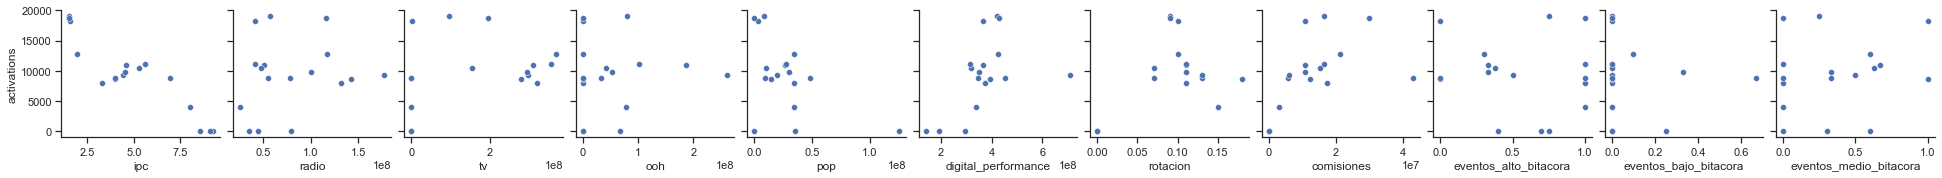

In [5]:
plt.figure(figsize=(30,20)) 
sns.set_theme(style="ticks")

sns.pairplot(df, x_vars=['ipc','radio','tv','ooh','pop','digital_performance','rotacion','comisiones','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'], y_vars=['activations']) 

plt.show()

### Correlaciones

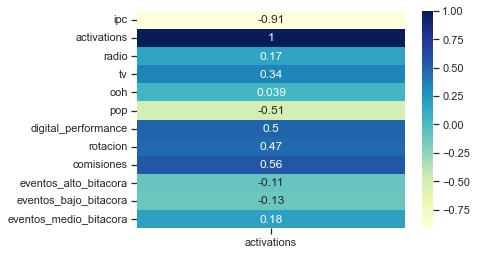

In [6]:
corrMatrix_1 = df.corr(method ='pearson')[['activations']]


sns.heatmap(corrMatrix_1, annot=True,cmap="YlGnBu")

plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit_transform(df)

df = pd.DataFrame(scaled,columns=['ipc','activations','radio','tv','ooh','pop','digital_performance','rotacion','comisiones','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'])

df = df.fillna(0)
#df = df.dropna()

df.head()

,ipc,activations,radio,tv,ooh,pop,digital_performance,rotacion,comisiones,eventos_alto_bitacora,eventos_bajo_bitacora,eventos_medio_bitacora
0,-1.311166,1.518347,-0.870890,-1.066161,-0.736316,-0.857172,-0.004035,0.177992,-0.181057,-1.531394,-0.452709,1.889798
1,-1.326841,1.682916,-0.508717,-0.418478,0.365472,-0.669777,0.480201,-0.023732,0.325655,0.536961,-0.452709,-0.343281
2,-1.346435,1.613099,0.866201,0.260227,-0.736316,-0.959425,0.541714,-0.023732,1.560063,1.226413,-0.452709,-1.087641
3,-1.174010,0.603673,0.894770,1.437996,-0.736316,0.258356,0.514015,0.177992,0.772871,-0.704052,0.117369,0.698822
4,-0.644979,-0.231898,1.227128,1.119291,-0.736316,0.258356,0.056376,0.379717,0.402411,1.226413,-0.452709,-1.087641


### Omitir Variables 
De acuerdo a su correlación

In [8]:
del df['eventos_medio_bitacora']
#del df['ipc']
del df['eventos_alto_bitacora']
del df['ooh']
#del df['pop']
del df['tv']
#del df['rotacion']
#del df['comisiones']
del df['digital_performance']
del df['eventos_bajo_bitacora']

### Regresión Lineal

In [9]:
# División de los datos en train y test
# ==============================================================================
X = df.drop(columns='activations',axis=1)
y = df['activations']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: 0.921221155199454
MAE:  0.32735771853626305
MSE:  0.11219519229166665

explained_variance: 0.9332479857399774




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            activations   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              29.79
Date:                Thu, 14 Jul 2022   Prob (F-statistic):                    2.28e-06
Time:                        13:12:51   Log-Likelihood:                         -2.0548
No. Observations:                  17   AIC:                                      14.11
Df Residuals:                      12   BIC:                                      18.28
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ipc           -0.8594      0.115     -7.504      0.000      -1.109      -0.610
radio         -0.2472      0.088     -2.815      0.016      -0.439      -0.056
pop           -0.0890      0.093     -0.953      0.359      -0.293       0.114
rotacion       0.0045      0.097      0.047      0.964      -0.208       0.217
comisiones     0.2369      0.089      2.672      0.020       0.044       0.430
==============================================================================
Omnibus:                        0.742   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.690   Jarque-Bera (JB):                0.522
Skew:                          -0.396   Prob(JB):                        0.770
Kurtosis:                       2.669   Cond. No.                         2.69
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['ipc', 'radio', 'pop', 'rotacion', 'comisiones'], dtype='object')

w = [[-0.87140711 -0.17490101 -0.09499514 -0.10107633  0.21680843]], b = [-0.0307942]


In [11]:
model.params

ipc          -0.859358
radio        -0.247247
pop          -0.089038
rotacion      0.004535
comisiones    0.236948
dtype: float64

\begin{align}
\dot{activations} = \ -ipc(1.98578323e+03) - radio(2.36972564e-05) - pop(1.95845150e-05) - rotacion(1.18569141e+04) + comisiones(1.15658016e-04) + 21011.94399449\\
\end{align}

### Modelo Regresión Activaciones con Recarga y con PAC

In [48]:
# Creamos el cursor con el objeto conexion
cur2 = conexion.cursor()

# Ejecutamos una consulta
sql2 = """
select activations, activations_w_topups, activations_pacs
from sal_indicators_in sa 
where sales_channel = 'Direct Sales Force'
"""

consulta2 = cur2.execute(sql2)

data2 = cur2.fetchall()

In [49]:
df2 = pd.DataFrame(data2,columns=['activations','activations_w_topups','activations_pacs'])



df2 = df2.fillna(0)
#df = df.dropna()

df2.head()

,activations,activations_w_topups,activations_pacs
0,18199,18119,17374
1,19156,19042,18332
2,18750,18683,18019
3,12880,12919,12317
4,8021,7949,7640


##### Recargas

In [50]:
# División de los datos en train y test
# ==============================================================================

X = df2[['activations']]
y = df2['activations_w_topups']


X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: 0.9999728129832471
MAE:  29.988448340945205
MSE:  1292.3251763630178

explained_variance: 0.99997286170173




<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     activations_w_topups   R-squared (uncentered):                   1.000
Model:                              OLS   Adj. R-squared (uncentered):              1.000
Method:                   Least Squares   F-statistic:                          5.038e+05
Date:                  Mon, 11 Jul 2022   Prob (F-statistic):                    2.03e-37
Time:                          14:40:00   Log-Likelihood:                         -94.233
No. Observations:                    17   AIC:                                      190.5
Df Residuals:                        16   BIC:                                      191.3
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
activations     0.9947      0.001    709.756      0.000       0.992       0.998
==============================================================================
Omnibus:                       14.350   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.144
Skew:                          -1.412   Prob(JB):                      0.00140
Kurtosis:                       6.253   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['activations'], dtype='object')

w = [[0.99533034]], b = [-5.59531552]


\begin{align}
\dot{activations W topups} = \ activations(0.99533034) - 5.59531552\\
\end{align}

##### PACS

In [52]:
# División de los datos en train y test
# ==============================================================================
X = df2[['activations_w_topups']]
y = df2['activations_pacs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: 0.9981637127671498
MAE:  248.84323123906537
MSE:  78266.92430870405

explained_variance: 0.9981684723698568




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       activations_pacs   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          3.001e+04
Date:                Mon, 11 Jul 2022   Prob (F-statistic):                    1.28e-27
Time:                        14:40:01   Log-Likelihood:                         -117.27
No. Observations:                  17   AIC:                                      236.5
Df Residuals:                      16   BIC:                                      237.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
activations_w_topups     0.9466      0.005    173.243      0.000       0.935       0.958
==============================================================================
Omnibus:                        1.429   Durbin-Watson:                   0.411
Prob(Omnibus):                  0.490   Jarque-Bera (JB):                1.168
Skew:                          -0.575   Prob(JB):                        0.558
Kurtosis:                       2.430   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['activations_w_topups'], dtype='object')

w = [[0.95718182]], b = [-126.64639209]


\begin{align}
\dot{activations PACs} = \ activationsWtopups(0.95718182) - 126.64639209\\
\end{align}